In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [4]:
data[['binary','budget','domgross_2013$', 'intgross_2013$']].groupby('binary').mean()

,budget,domgross_2013$,intgross_2013$
binary,,,
FAIL,5.041529e+07,1.077744e+08,2.225298e+08
PASS,3.792917e+07,7.959192e+07,1.673600e+08


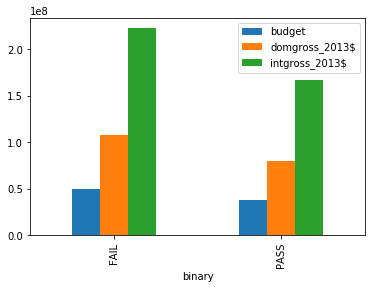

In [5]:
data[['binary','budget','domgross_2013$', 'intgross_2013$']].groupby('binary').mean().plot.bar()

In [20]:
data.loc[data['binary'] == 'PASS'][['year','budget']].head()

,year,budget
1,2012,45000000
7,2013,12000000
8,2013,13000000
10,2013,40000000
11,2013,25000000


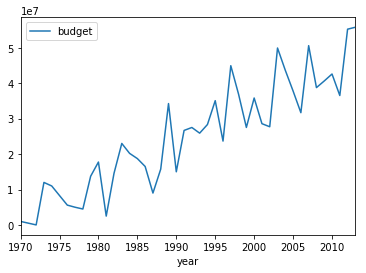

In [22]:
data.loc[data['binary'] == 'PASS'][['year','budget']].groupby('year').mean().plot.line()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

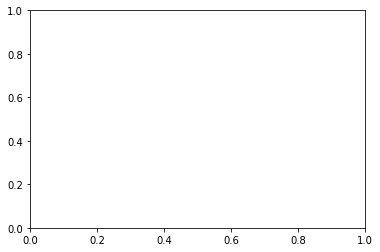

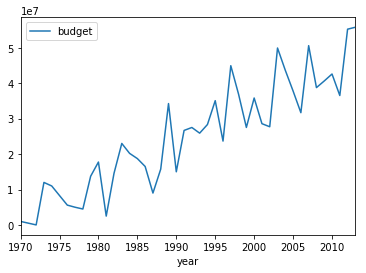

In [25]:
f, ax = plt.subplots(1)
ax.plot(data.loc[data['binary'] == 'PASS'][['year','budget']].groupby('year').mean().plot.line())
data.loc[data['binary'] == 'FAIL'][['year','budget']].groupby('year').mean().plot.line()